In [156]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [157]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_set = shuffled_indices[:test_set_size]
    train_set = shuffled_indices[test_set_size:]
    return data.iloc[train_set], data.iloc[test_set]

In [158]:
housing = pd.read_csv("data.csv")

In [159]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [160]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [161]:
housing["ocean_proximity"].describe()

count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object

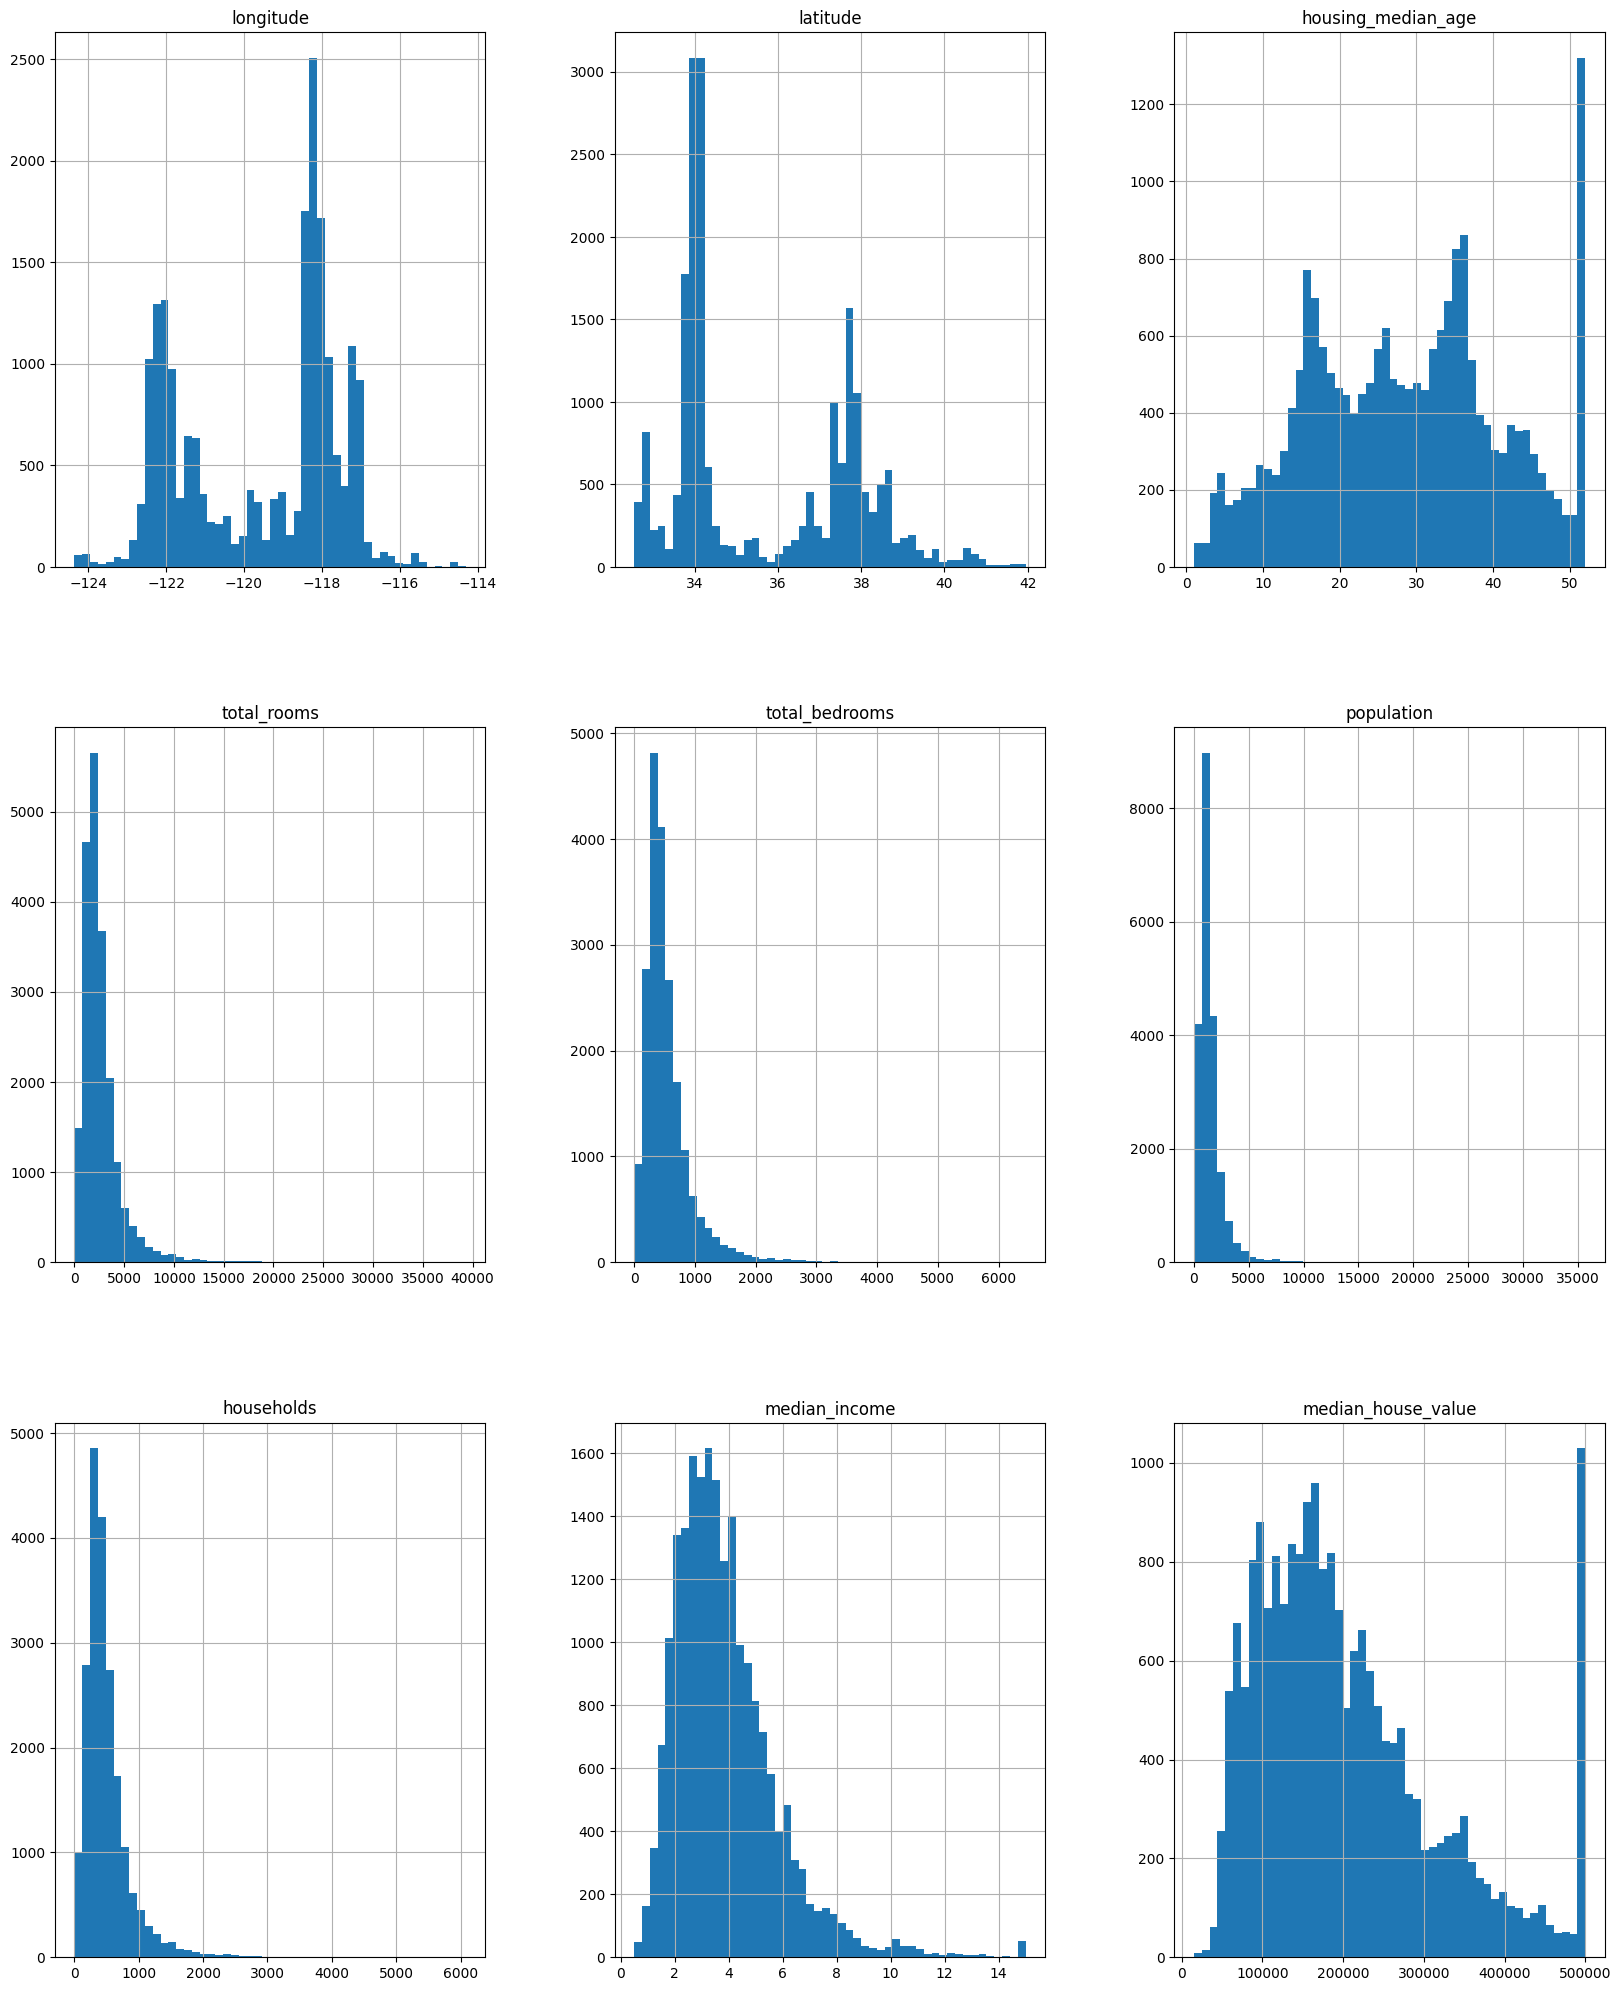

In [162]:
housing.hist(bins = 50, figsize=(20,25))
plt.show()

# Spliiting the data set in training data and testing data

In [163]:
train_set , test_set = split_train_test(housing, .20)
print(len(train_set))
print(len(test_set))

16512
4128


### using sci-kit learn model to make training set and testing set

In [164]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


if the dataset is not large enough there is a risk of introducing significant sampling bias. 
Stratified Sampling: division of population into homogeneous subgroups called strata, and the right number of instances is sampled from each stratum to gaurentee that the test set is representative of the overall population.

In [165]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0, 1.5, 3.0, 5.4, 6, np.inf], labels=[1, 2, 3, 4, 5])


<Axes: >

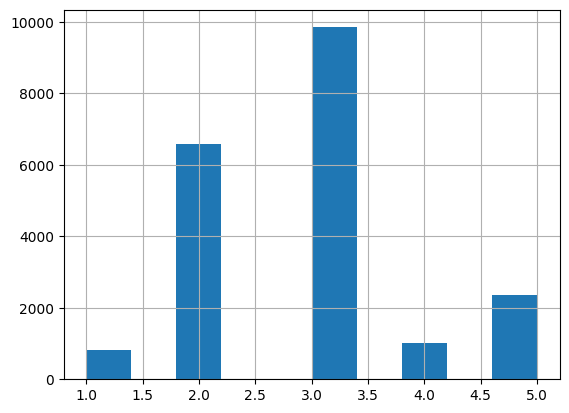

In [166]:
housing["income_cat"].hist()

#### we can use scikit learn module to accoplish this result 

In [167]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_set, test_set in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_set]
    strat_test_set = housing.loc[test_set]


In [168]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.476986
2    0.318798
5    0.114341
4    0.049903
1    0.039971
Name: count, dtype: float64

In [169]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop("income_cat", axis = 1, inplace = True)

<Axes: xlabel='longitude', ylabel='latitude'>

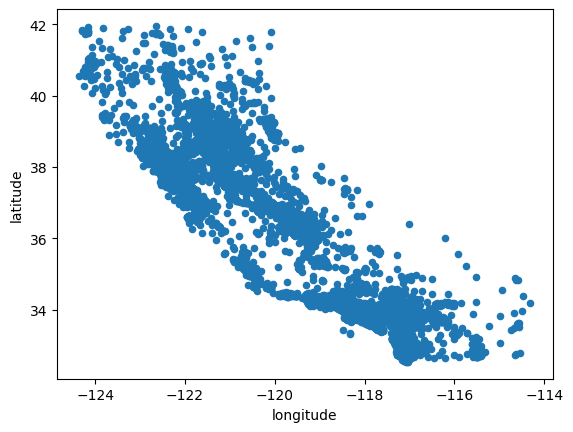

In [170]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

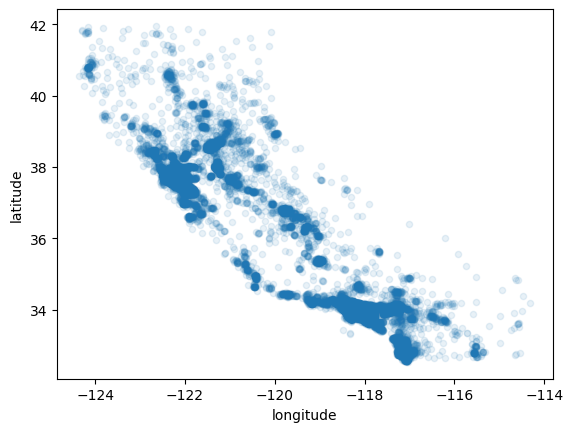

In [171]:
housing.plot(kind = "scatter", x="longitude", y = "latitude", alpha = 0.1)

#### now we will plot with radius (option s) of each circle representing the districs population and the color(option c) will represent the price which follows cmap which ranges from blue(low values) to red(high values)

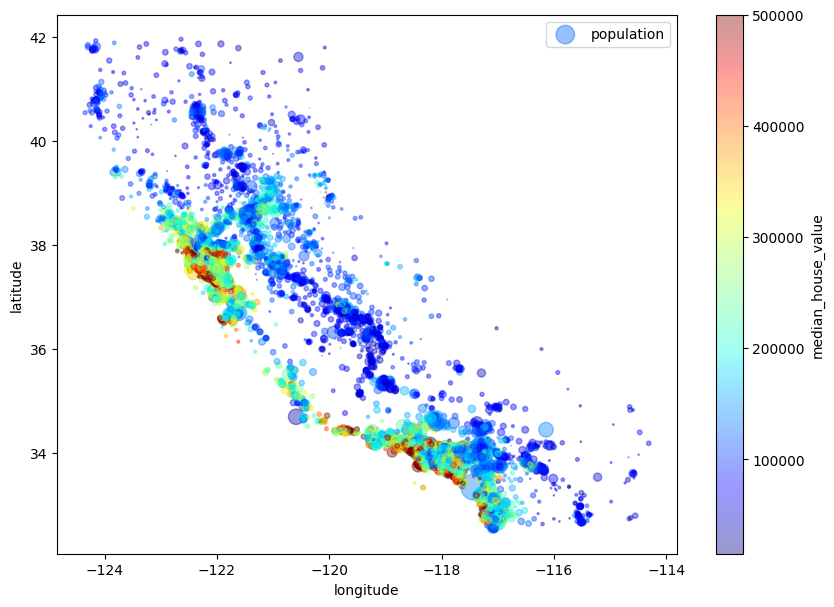

In [172]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4, s=housing["population"]/100, label = "population", figsize = (10,7), c ="median_house_value", cmap=plt.get_cmap("jet"), colorbar = True,)
plt.legend()

##### this plot tells that the housing prices are very much related to the location and to the population density.

## LOOKING FOR CORRELATIONS

In [173]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

ValueError: could not convert string to float: 'INLAND'

correlation only checks for linear relationship between the datasets

#### another way to check correlation between attributes is to use pandas scatter_matrix function, which plots every numerical attribute against every other numerical attribute. 

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

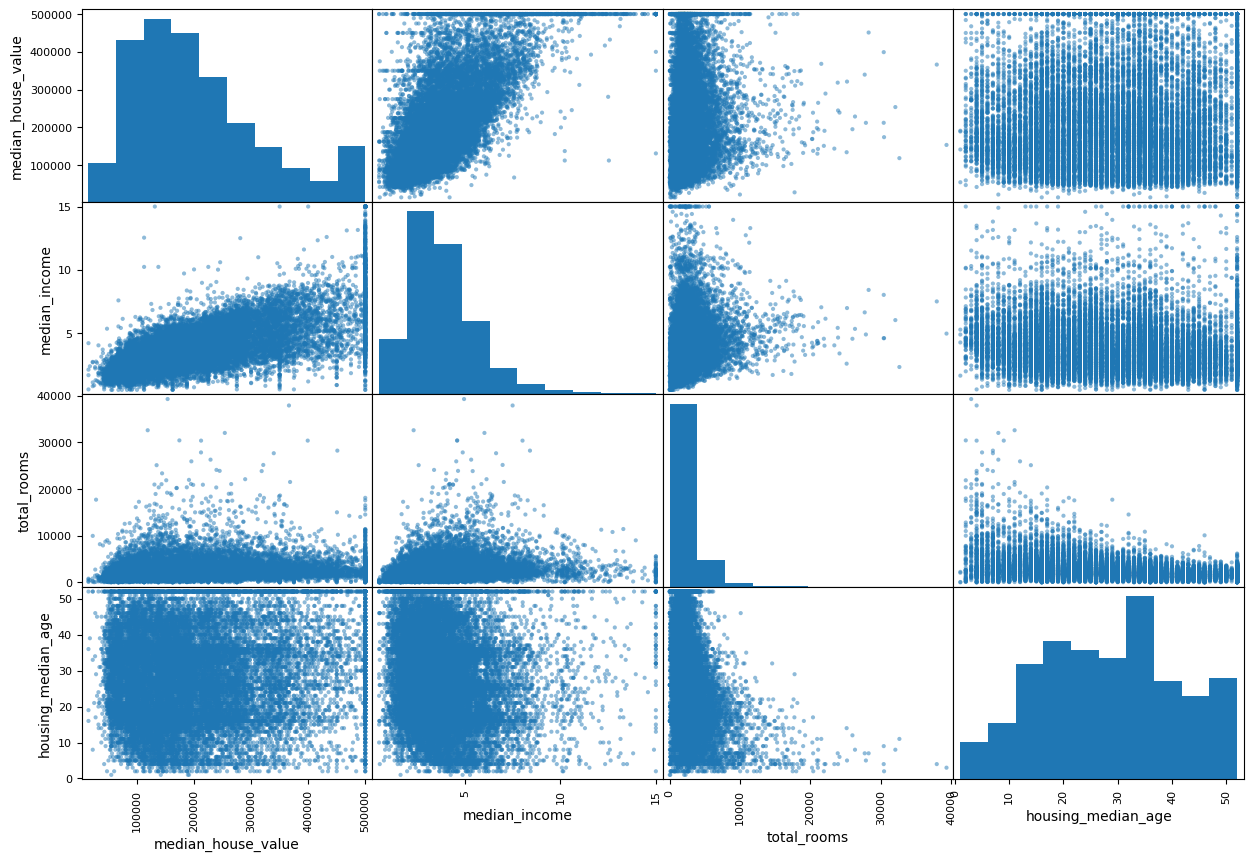

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(15,10))

<Axes: xlabel='median_income', ylabel='median_house_value'>

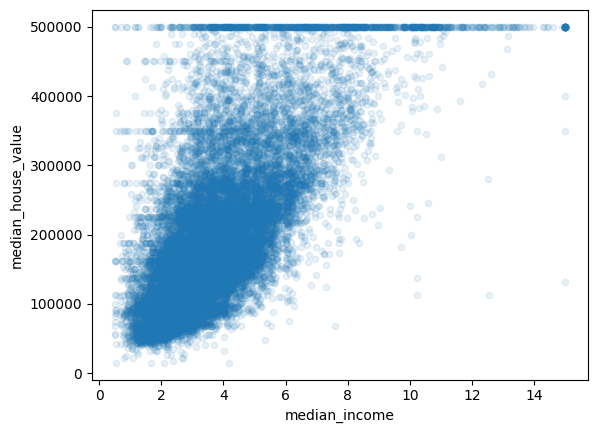

In [ ]:
housing.plot(kind = "scatter", x= "median_income", y = "median_house_value", alpha = 0.1)

### creating new meaningful attributes

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_househols"] = housing["population"]/housing["households"]

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688186
rooms_per_household         0.149182
total_rooms                 0.133628
housing_median_age          0.108167
households                  0.064040
total_bedrooms              0.047773
population_per_househols   -0.021801
population                 -0.025933
longitude                  -0.045834
latitude                   -0.144473
bedrooms_per_room          -0.262325
Name: median_house_value, dtype: float64

### Preparing the data for machine learning algorithms

In [ ]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace = True)


C:\Users\sarwe\AppData\Local\Temp\ipykernel_19052\2875256518.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace = True)


### using scikit learn SimpleImputer 

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis= 1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
13285,INLAND
18930,NEAR BAY
18658,NEAR OCEAN
12935,INLAND
17733,<1H OCEAN
10788,<1H OCEAN
1935,INLAND
16554,INLAND
12924,INLAND
16184,INLAND


### converting text attriburte to numerical attribute using Scikit Learn Ordinal Encoder

In [179]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### we will use OneHotEncoder 

In [182]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1Hot = cat_encoder.fit_transform(housing_cat)
cat_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [191]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    # ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)


In [192]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
    ])
housing_prepapred = full_pipeline.fit_transform(housing)

#### now we have made a array containign our non labellled attributes with the desired values for our ML algorithms

# Linear Regression Model 

In [193]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepapred, housing_labels)

LinearRegression()

In [194]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print(" \n")
print("Labels", list(some_labels))

Predictions: [166124.51682244 253436.50169317 263471.08716686 166558.8440566
 232881.75206058]
 

Labels [121300.0, 143100.0, 290700.0, 216100.0, 164500.0]


## RMSE 

In [217]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepapred)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68688.76264501036

we can observe here that there is a error of 68k but this is very large error compared to pricing of houses placed between 120k to 265k

# DecisionTreeRegresor

In [197]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepapred, housing_labels)

DecisionTreeRegressor()

In [198]:
housing_predictions = tree_reg.predict(housing_prepapred)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

this does not imply that our model is perfect but it is more likely that model has badly overfit the data

# Cross Validation 

In [199]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepapred, housing_labels, scoring="neg_mean_squared_error", cv = 10)

tree_rmse_scores = np.sqrt(-scores)

In [200]:
def display_scores(scores):
    print("scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [201]:
display_scores(tree_rmse_scores)

scores: [65154.07831152 74367.45099245 69556.99246236 64345.62418083
 70475.33323163 71274.45871146 71514.08699551 70784.57715221
 66343.69620728 70800.58476683]
Mean:  69461.68830120654
Standard deviation:  3009.912170383385


In [202]:
lin_scores = cross_val_score(lin_reg, housing_prepapred, housing_labels, scoring="neg_mean_squared_error", cv =10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

scores: [67049.85787909 70808.52643808 71122.54366978 65898.24537613
 69859.2922686  70068.40869024 67890.99169878 67999.41461979
 66959.96745988 71153.95402269]
Mean:  68881.12021230646
Standard deviation:  1843.1161941327023


now we can see that Decision Tree performs even worse than linear Regression

# Random Forests

In [214]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepapred, housing_labels)
forest_scores = cross_val_score(forest_reg, housing_prepapred, housing_labels, scoring="neg_mean_squared_error", cv =10)
forest_rmse = np.sqrt(-forest_scores)

In [215]:
display_scores(forest_rmse)

scores: [48175.95385325 52379.19528102 49886.35134947 46451.78967908
 50797.19371737 49008.91338088 48793.51746802 48379.68757283
 47431.92044319 52153.26344233]
Mean:  49345.778618744116
Standard deviation:  1850.4250837160125


we can see that Random Forest is much more promising. But still score on training set is still much lower than on the validation sets, meaning the models is still overfittig the training set.